<a href="https://colab.research.google.com/github/pythontrainernag/megha/blob/master/Project_Stock_Market_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Stock Market Analysis and Prediction

## Stock Market Data From Google Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Google Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. Predicted future stock prices through a Monte Carlo method!
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [0]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [0]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime


#### Section 1 - Basic Analysis of Stock Information


In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [0]:
#list of tech_stock for analytics
tech_list=['AAPL','GOOGL','MSFT','AMZN','GSS']

#Start and end times for date grab
end=datetime.now()
start=datetime(end.year-3,end.month,end.day)
#setting Data frame as stock ticker
import pandas_dataReader.data as web
for stock in tech_list:
  globals()[stock]=web.DataReader(stock,'yahoo',start,end)

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL(Apple) Stock DataFrame to get a feel for the data.

In [0]:
GSS.head()

High   Low  Open  Close    Volume  Adj Close
Date                                                    
2018-04-16  3.60  3.30  3.50   3.30  325300.0       3.30
2018-04-17  3.45  3.35  3.45   3.40  157800.0       3.40
2018-04-18  3.60  3.40  3.40   3.55  344400.0       3.55
2018-04-19  3.65  3.45  3.60   3.55  154800.0       3.55
2018-04-20  3.65  3.55  3.55   3.65  211000.0       3.65

In [0]:
AAPL.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2018-04-16  176.190002  174.830002  175.029999  175.820007  21578400.0   
2018-04-17  178.940002  176.410004  176.490005  178.240005  26509000.0   
2018-04-18  178.820007  176.880005  177.809998  177.839996  20754500.0   
2018-04-19  175.389999  172.660004  173.759995  172.800003  34808800.0   
2018-04-20  171.220001  165.429993  170.600006  165.720001  65491100.0   

             Adj Close  
Date                    
2018-04-16  173.182922  
2018-04-17  175.566620  
2018-04-18  175.172607  
2018-04-19  170.208206  
2018-04-20  163.234390

In [0]:
# Summery stats for Apple Stock
AAPL.describe()

High         Low        Open       Close        Volume  \
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02   
mean   191.296469  187.578571  189.442897  189.509246  3.237258e+07   
std     21.783558   21.486442   21.618454   21.623933  1.433564e+07   
min    145.720001  142.000000  143.979996  142.190002  1.251390e+07   
25%    174.939999  172.080006  173.655006  173.922493  2.252265e+07   
50%    189.604996  186.824997  188.385002  188.169998  2.845160e+07   
75%    209.312500  205.632496  207.299999  207.645000  3.883658e+07   
max    233.470001  229.779999  230.779999  232.070007  9.624670e+07   

        Adj Close  
count  252.000000  
mean   188.181310  
std     21.317650  
min    141.582779  
25%    173.174690  
50%    186.503845  
75%    205.888016  
max    230.275482

In [0]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-04-16 to 2019-04-15
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the AAPL(Apple) stocks.

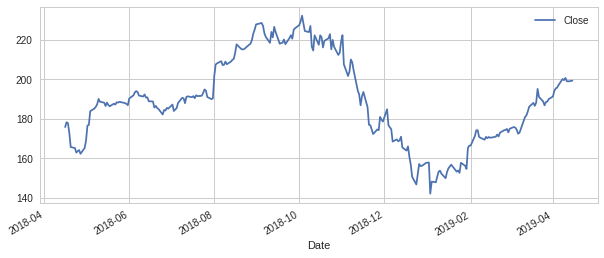

In [0]:
# Let's see a historical view of the closing price
AAPL['Close'].plot(legend=True, figsize=(10,4))

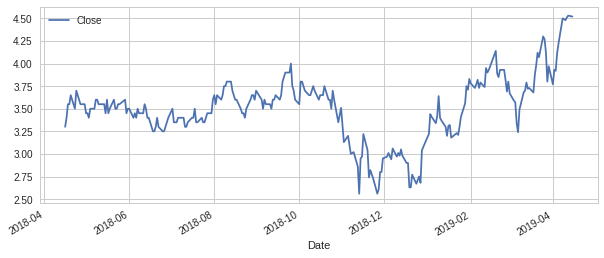

In [0]:
GSS['Close'].plot(legend=True, figsize=(10,4))

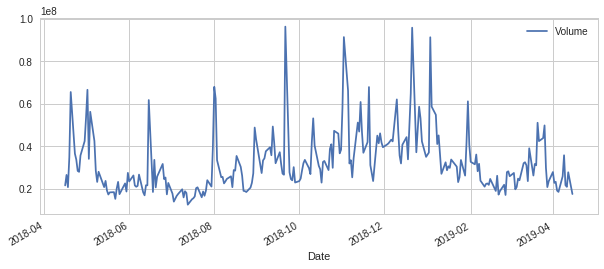

In [0]:
# Now let's plot the total volume of stock being traded each day over the past year

AAPL['Volume'].plot(legend=True, figsize=(10,4))

We can see that on Jan'2019 was the higher for AAPL stock being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for AAPL stock.
Let's go ahead and caculate the moving average for the AAPL stock.


In [0]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = AAPL['Close'].rolling(ma).mean()
    GSS[column_name] = GSS['Close'].rolling(ma).mean()

Now, lets plot all the additional Moving Averages for AAPL stock

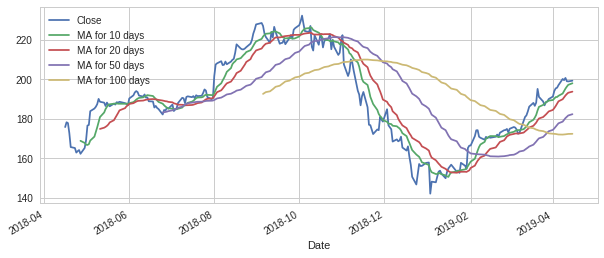

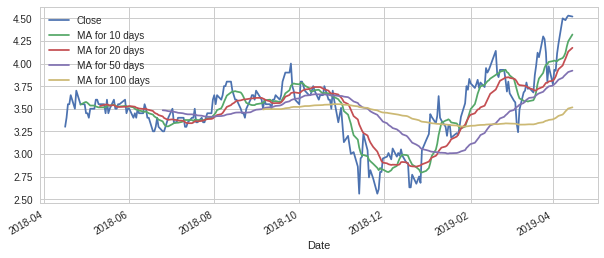

In [0]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))
GSS[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis


Now, that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. 


In order to do so, we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the APPL stock.


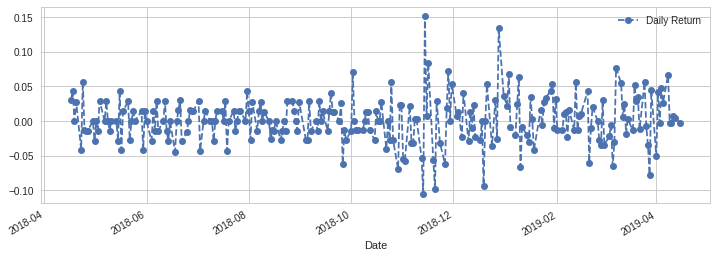

In [0]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()
GSS['Daily Return'] = GSS['Close'].pct_change()

# Lets plot the daily return percentage
#AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')
GSS['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

Great, now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

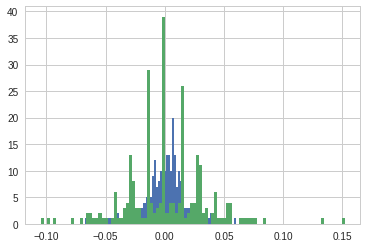

In [0]:
# only with histogram
AAPL['Daily Return'].hist(bins=100)
GSS['Daily Return'].hist(bins=100)

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


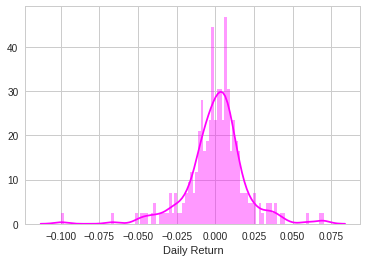

In [0]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta')

Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [0]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df = DataReader(tech_list, 'yahoo', start, end)['Close']

In [0]:
closingprice_df.head(10)

Symbols           AAPL         AMZN        GOOGL   GSS       MSFT
Date                                                             
2018-04-16  175.820007  1441.500000  1046.099976  3.30  94.169998
2018-04-17  178.240005  1503.829956  1079.359985  3.40  96.070000
2018-04-18  177.839996  1527.839966  1075.390015  3.55  96.440002
2018-04-19  172.800003  1556.910034  1089.449951  3.55  96.110001
2018-04-20  165.720001  1527.489990  1077.319946  3.65  95.000000
2018-04-23  165.240005  1517.859985  1073.810059  3.50  95.349998
2018-04-24  162.940002  1460.089966  1022.640015  3.70  93.120003
2018-04-25  163.649994  1460.170044  1022.989990  3.65  92.309998
2018-04-26  164.220001  1517.959961  1043.310059  3.60  94.260002
2018-04-27  162.320007  1572.619995  1031.449951  3.55  95.820000

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the APPL stock.

In [0]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [0]:
tech_returns.head()

Symbols         AAPL      AMZN     GOOGL       GSS      MSFT
Date                                                        
2018-04-16       NaN       NaN       NaN       NaN       NaN
2018-04-17  0.013764  0.043240  0.031794  0.030303  0.020176
2018-04-18 -0.002244  0.015966 -0.003678  0.044118  0.003851
2018-04-19 -0.028340  0.019027  0.013074  0.000000 -0.003422
2018-04-20 -0.040972 -0.018896 -0.011134  0.028169 -0.011549

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

##### GOOGL is a Alphabet Inc Class A Stock.

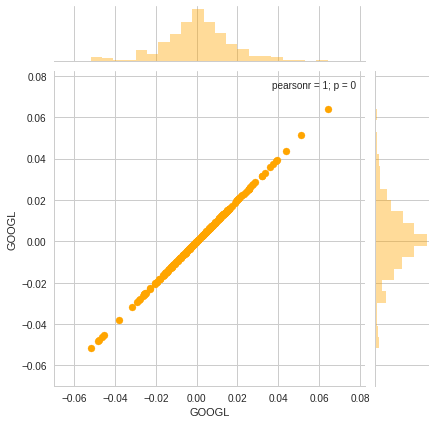

In [0]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOGL','GOOGL',tech_returns,kind='scatter',color='orange')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

So let's go ahead and compare Google and Amazon the same way.

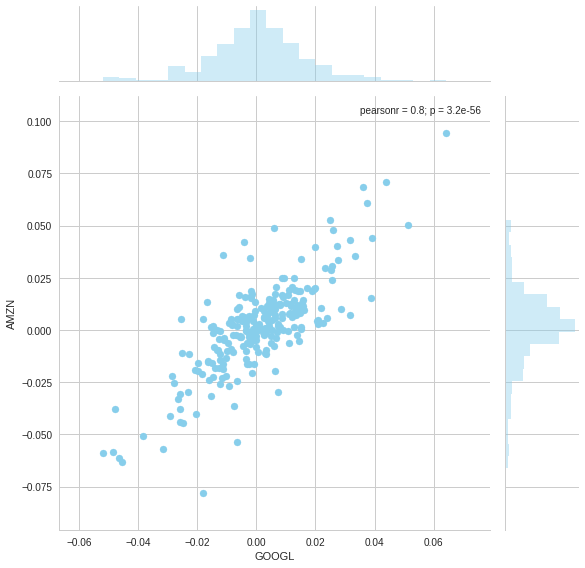

In [0]:
# We'll use joinplot to compare the daily returns of Google and Amazon.

sns.jointplot('GOOGL','AMZN',tech_returns, kind='scatter',size=8, color='skyblue')

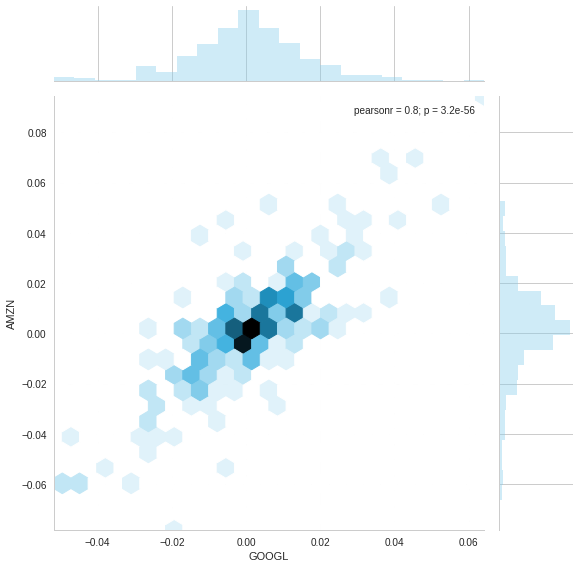

In [0]:
# with Hex plot
sns.jointplot('GOOGL','AMZN',tech_returns, kind='hex',size=8, color='skyblue')

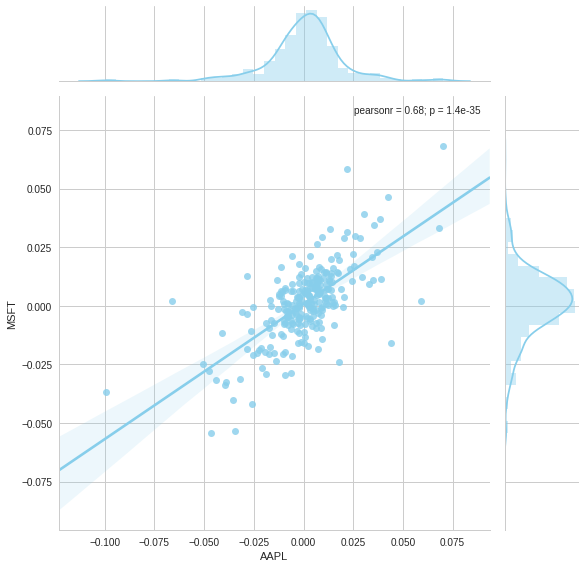

In [0]:
# Lets check out for Apple and Microsoft with reg jointplot
sns.jointplot('AAPL','MSFT',tech_returns, kind='reg', size=8, color='skyblue')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

Url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

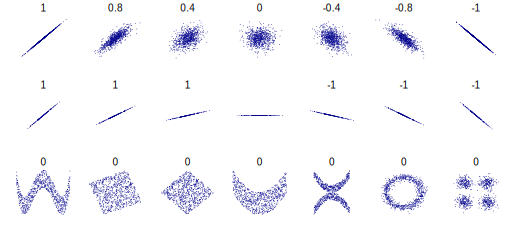

In [0]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and Pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

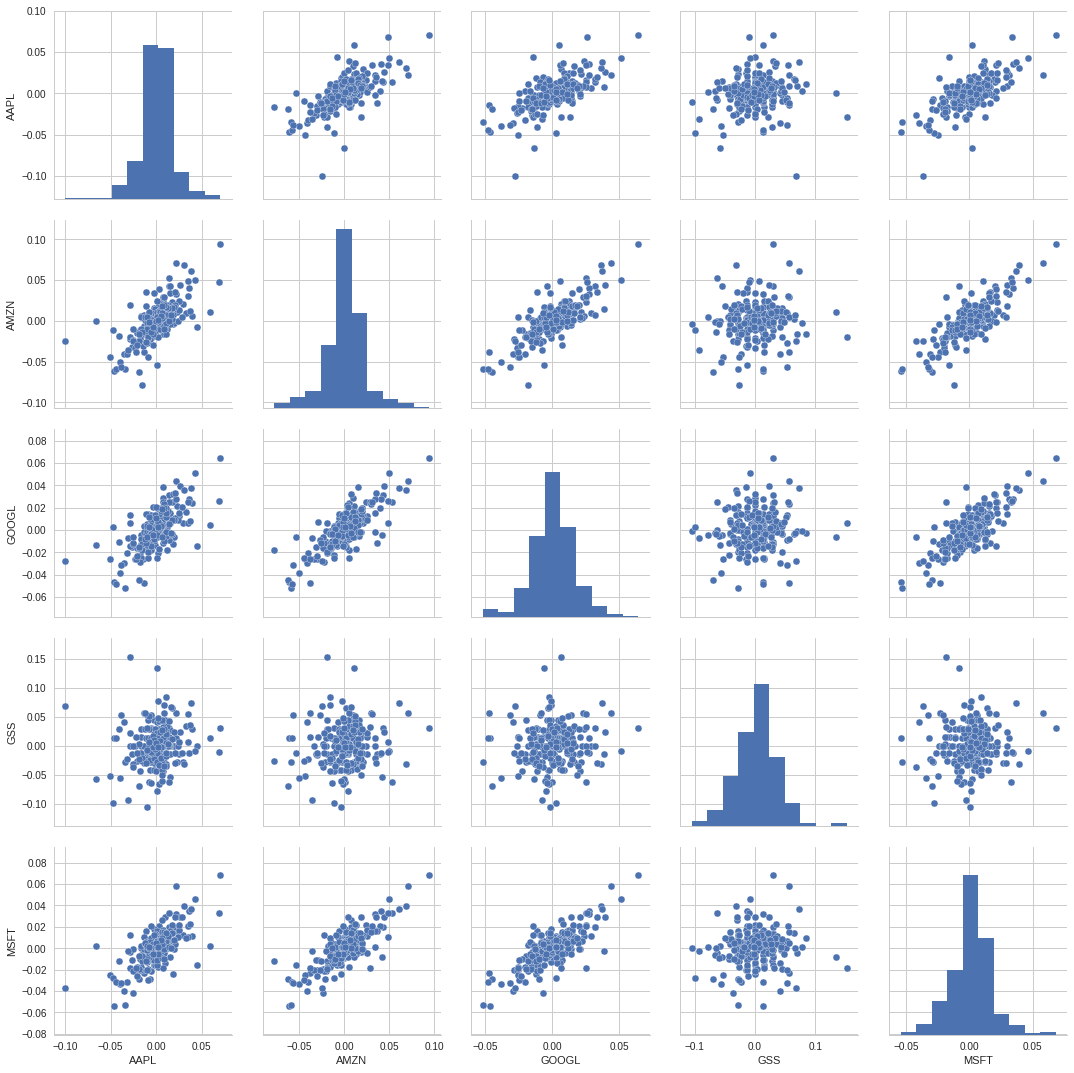

In [0]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),size=3)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 

Below is an example of utilizing the full power of seaborn to achieve this result.

/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


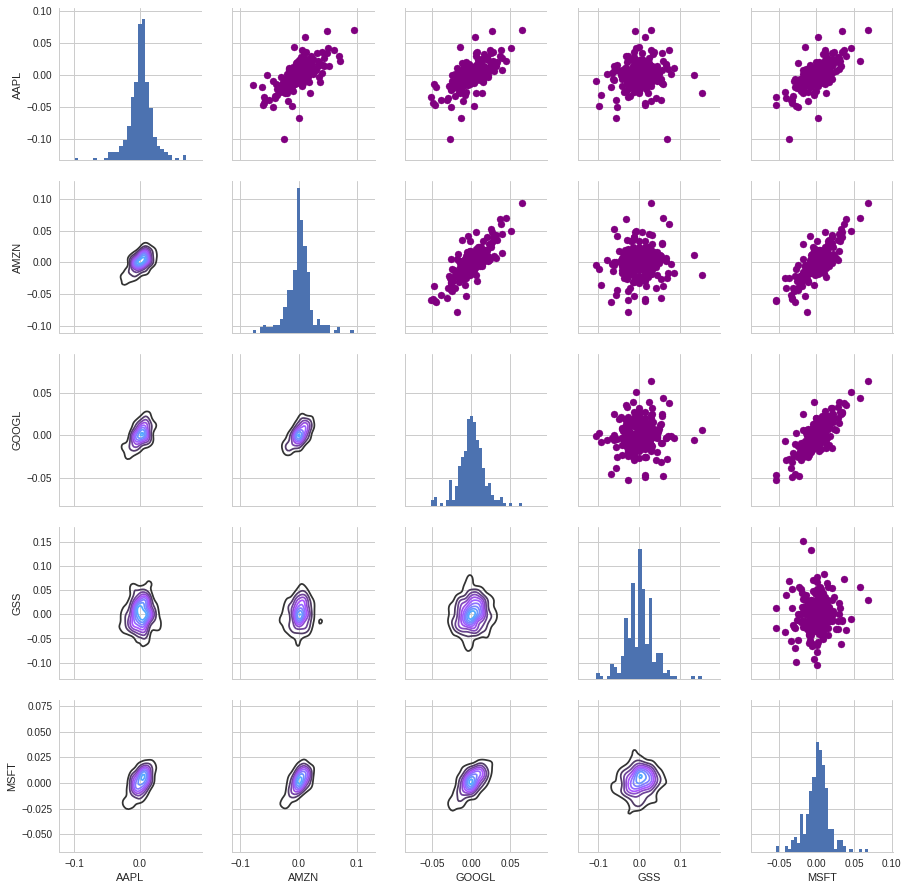

In [0]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

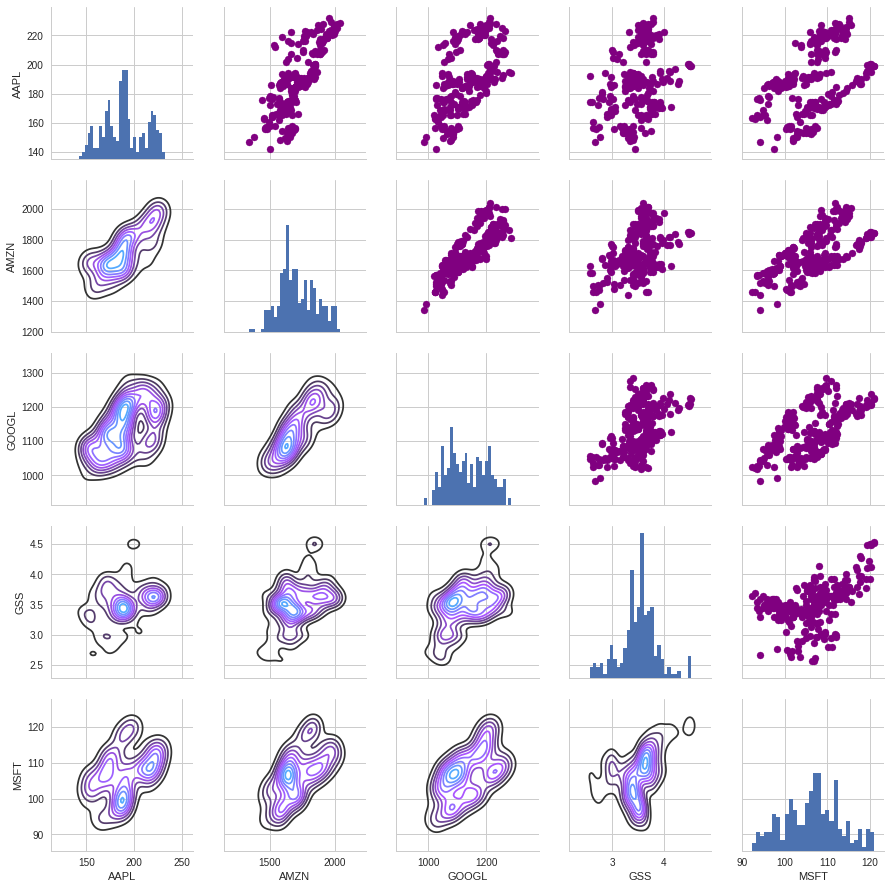

In [0]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Amazon stocks.

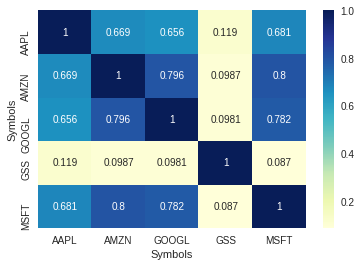

In [0]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

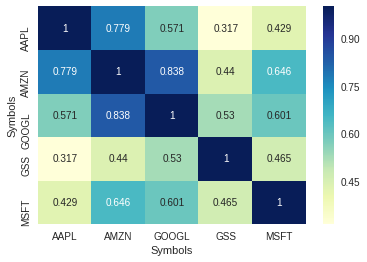

In [0]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

##### Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [0]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [0]:
rets.head()

Symbols         AAPL      AMZN     GOOGL       GSS      MSFT
Date                                                        
2018-04-17  0.013764  0.043240  0.031794  0.030303  0.020176
2018-04-18 -0.002244  0.015966 -0.003678  0.044118  0.003851
2018-04-19 -0.028340  0.019027  0.013074  0.000000 -0.003422
2018-04-20 -0.040972 -0.018896 -0.011134  0.028169 -0.011549
2018-04-23 -0.002896 -0.006304 -0.003258 -0.041096  0.003684

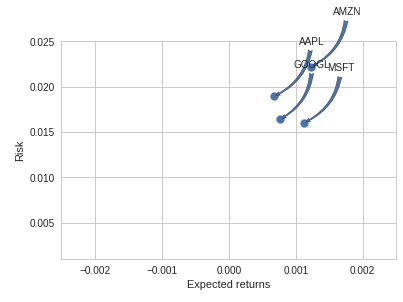

In [0]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

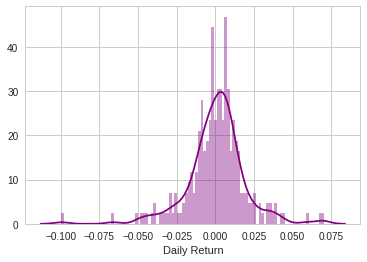

In [0]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now we can use quantile to get the risk value for the stock.

In [0]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.02978999429940099

The 0.05 empirical quantile of daily returns is at -0.016. That means that with 95% confidence, our worst daily loss will not exceed 1.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.016 * 1,000,000 = $16,000.

In [0]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.03790460473542845

In [0]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.02567358016337179

In [0]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.027091646426765648

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Google stock DataFrame GOOGL


In [0]:
rets.head()

Symbols         AAPL      AMZN     GOOGL       GSS      MSFT
Date                                                        
2018-04-17  0.013764  0.043240  0.031794  0.030303  0.020176
2018-04-18 -0.002244  0.015966 -0.003678  0.044118  0.003851
2018-04-19 -0.028340  0.019027  0.013074  0.000000 -0.003422
2018-04-20 -0.040972 -0.018896 -0.011134  0.028169 -0.011549
2018-04-23 -0.002896 -0.006304 -0.003258 -0.041096  0.003684

In [0]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1.0/days
print dt

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']
print mu

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']
print sigma

0.0027397260274
0.0007681841698218009
0.016409086942579656


In [0]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1.0/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
gmu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
gsigma = rets.std()['GOOGL']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [0]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

Awesome! Now lets put above function to work.

In [0]:
# For Google Stock - GOOGL
GOOGL.head()

High          Low         Open        Close   Volume  \
Date                                                                      
2018-04-16  1051.430054  1033.920044  1045.550049  1046.099976  1488800   
2018-04-17  1085.000000  1057.089966  1061.199951  1079.359985  2729200   
2018-04-18  1082.000000  1070.520020  1079.010010  1075.390015  1556300   
2018-04-19  1097.510010  1069.020020  1069.020020  1089.449951  1994200   
2018-04-20  1094.750000  1072.099976  1084.270020  1077.319946  2121700   

              Adj Close  
Date                     
2018-04-16  1046.099976  
2018-04-17  1079.359985  
2018-04-18  1075.390015  
2018-04-19  1089.449951  
2018-04-20  1077.319946

In [0]:
GSS.head()

High   Low  Open  Close    Volume  Adj Close  MA for 10 days  \
Date                                                                       
2018-04-16  3.60  3.30  3.50   3.30  325300.0       3.30             NaN   
2018-04-17  3.45  3.35  3.45   3.40  157800.0       3.40             NaN   
2018-04-18  3.60  3.40  3.40   3.55  344400.0       3.55             NaN   
2018-04-19  3.65  3.45  3.60   3.55  154800.0       3.55             NaN   
2018-04-20  3.65  3.55  3.55   3.65  211000.0       3.65             NaN   

            MA for 20 days  MA for 50 days  MA for 100 days  Daily Return  
Date                                                                       
2018-04-16             NaN             NaN              NaN           NaN  
2018-04-17             NaN             NaN              NaN      0.030303  
2018-04-18             NaN             NaN              NaN      0.044118  
2018-04-19             NaN             NaN              NaN      0.000000  
2018-04-20             NaN             NaN              NaN      0.028169

Text(0.5,1,'Monte Carlo Analysis for Google')

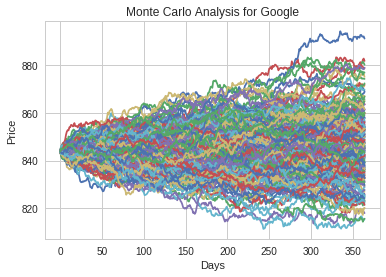

In [0]:
start_price = 843.72

for run in range(200):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

Text(0.5,1,'Monte Carlo Analysis for Google')

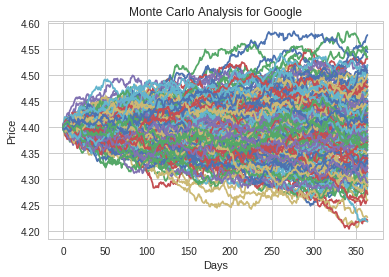

In [0]:
start_price = 4.40

for run in range(200):
  plt.plot(stock_monte_carlo(start_price, days, gmu, gsigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [0]:
# For Amazon Stock - AMZN
AMZN.head()

High          Low         Open        Close   Volume  \
Date                                                                      
2018-04-16  1447.000000  1427.479980  1445.000000  1441.500000  2808600   
2018-04-17  1507.189941  1457.020020  1462.300049  1503.829956  5114400   
2018-04-18  1533.800049  1504.109985  1514.650024  1527.839966  5227500   
2018-04-19  1568.520020  1539.060059  1543.219971  1556.910034  6523700   
2018-04-20  1561.199951  1516.089966  1561.199951  1527.489990  5541600   

              Adj Close  
Date                     
2018-04-16  1441.500000  
2018-04-17  1503.829956  
2018-04-18  1527.839966  
2018-04-19  1556.910034  
2018-04-20  1527.489990

Text(0.5,1,'Monte Carlo Analysis for Amazon')

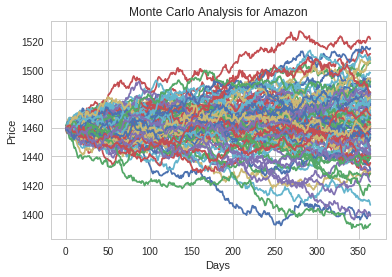

In [0]:
start_price = 1459.780029

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [0]:
# For Apple Stock - AAPL
AAPL.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2018-04-16  176.190002  174.830002  175.029999  175.820007  21578400.0   
2018-04-17  178.940002  176.410004  176.490005  178.240005  26509000.0   
2018-04-18  178.820007  176.880005  177.809998  177.839996  20754500.0   
2018-04-19  175.389999  172.660004  173.759995  172.800003  34808800.0   
2018-04-20  171.220001  165.429993  170.600006  165.720001  65491100.0   

             Adj Close  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                     
2018-04-16  173.182922             NaN             NaN             NaN   
2018-04-17  175.566620             NaN             NaN             NaN   
2018-04-18  175.172607             NaN             NaN             NaN   
2018-04-19  170.208206             NaN             NaN             NaN   
2018-04-20  163.234390             NaN             NaN             NaN   

            MA for 100 days  Daily Return  
Date                                       
2018-04-16              NaN           NaN  
2018-04-17              NaN      0.013764  
2018-04-18              NaN     -0.002244  
2018-04-19              NaN     -0.028340  
2018-04-20              NaN     -0.040972

Text(0.5,1,'Monte Carlo Analysis for Apple')

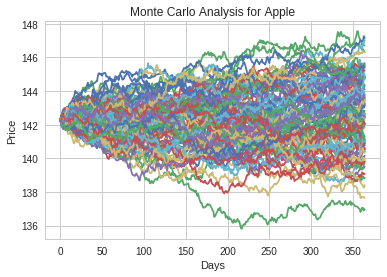

In [0]:
start_price = 142.3

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [0]:
# For Microsoft Stock - MSFT
MSFT.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2018-04-16  94.660004  93.419998  94.070000  94.169998  20288100.0  92.606865
2018-04-17  96.540001  94.879997  95.000000  96.070000  26771000.0  94.475334
2018-04-18  96.720001  95.519997  96.220001  96.440002  21043300.0  94.839195
2018-04-19  97.070000  95.339996  96.440002  96.110001  23552500.0  94.514664
2018-04-20  96.110001  94.050003  95.910004  95.000000  31154400.0  93.423088

Text(0.5,1,'Monte Carlo Analysis for Microsoft')

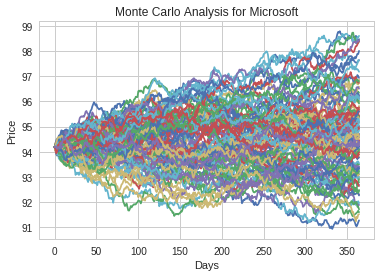

In [0]:
start_price = 94.18

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [0]:
# Lets start with Google stock price
start_price = 1052.979980

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Text(0.5,1,'Final price distribution for Google Stock(GOOGL) after 365 days')

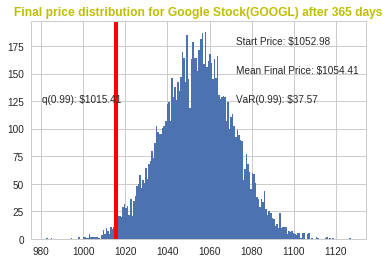

In [0]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='Y')


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $17.98 for every investment of 
830.09 (The price of one initial Google Stock).

This basically means for every initial GOOGL stock you purchase you're putting about $17.98 at risk 99% of the time from our Monte Carlo Simulation.


##### Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [0]:
# For Amazon Stock Price
start_price = 824.95

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Amazon Stock(AMZN) after 365 days')

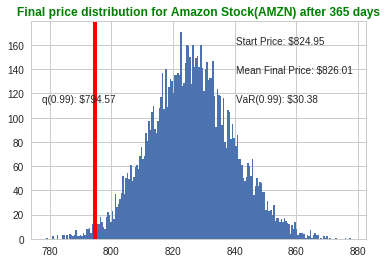

In [0]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for Amazon Stock(AMZN) after %s days" % days, weight='bold', color='G')

This basically means for every initial AMZN stock you purchase you're putting about $18.13 at risk 99% of the time from our Monte Carlo Simulation.

In [0]:
# For Apple Stock Price
start_price = 117.10

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Apple Stock(AAPL) after 365 days')

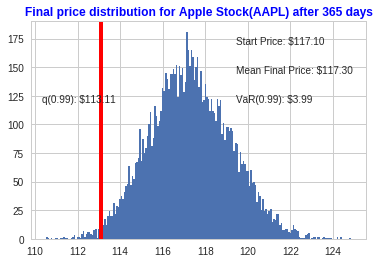

In [0]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for Apple Stock(AAPL) after %s days" % days, weight='bold', color='B')

Great! This basically means for every initial AAPL stock you purchase you're putting about $2.48 at risk 99% of the time from our Monte Carlo Simulation.

In [0]:
# For Microsoft Stock Price
start_price = 59.94

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Nice, This basically means for every initial MSFT stock you purchase you're putting about $1.28 at risk 99% of the time from our Monte Carlo Simulation.

Text(0.5,1,'Final price distribution for Microsoft Stock(MSFT) after 365 days')

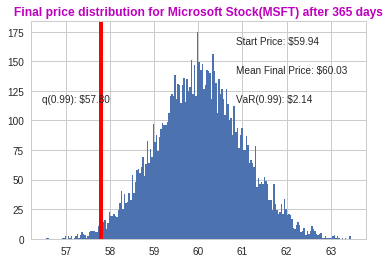

In [0]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for Microsoft Stock(MSFT) after %s days" % days, weight='bold', color='M')

Now lets estiamte the Value at Risk(VaR) for a stock related to other domains.


We'll estimate the VaR for:
 - Johnson & Johnson > JNJ (U.S.: NYSE) [JNJ](http://quotes.wsj.com/JNJ)
 - Wal-Mart Stores Inc. > WMT (U.S.: NYSE) [WMT](http://quotes.wsj.com/WMT)
 - Nike Inc. > NKE (U.S.: NYSE) [NKE](http://quotes.wsj.com/NKE)
 

By using the above methods to get Value at Risk.

In [0]:
# List of NYSE_stocks for analytics
NYSE_list = ['JNJ','NKE','WMT']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in NYSE_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

Let's go ahead and play aorund with the JNJ(Johnson & Johnson) Stock DataFrame to get a feel for the data.

In [0]:
JNJ.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2018-04-16  132.880005  131.279999  131.410004  131.759995   6379600.0   
2018-04-17  132.199997  128.809998  132.110001  130.539993  11008700.0   
2018-04-18  129.899994  126.940002  129.690002  127.720001   9383600.0   
2018-04-19  128.270004  126.889999  127.629997  127.550003   5959500.0   
2018-04-20  128.300003  126.169998  128.000000  126.660004   7743900.0   

             Adj Close  
Date                    
2018-04-16  128.251404  
2018-04-17  127.063904  
2018-04-18  124.318993  
2018-04-19  124.153519  
2018-04-20  123.287216

In [0]:
JNJ.describe()

High         Low        Open       Close        Volume  \
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02   
mean   133.963850  131.997064  132.991072  133.028929  7.338295e+06   
std      7.206877    7.117263    7.106262    7.170321  4.574790e+06   
min    120.800003  118.620003  120.120003  119.400002  3.404900e+06   
25%    128.270004  126.154999  127.500000  127.187498  5.428375e+06   
50%    134.720001  132.264999  133.700005  133.779999  6.510850e+06   
75%    139.465004  137.512497  138.467499  138.522495  7.747675e+06   
max    148.990005  147.000000  147.500000  147.839996  5.814020e+07   

        Adj Close  
count  252.000000  
mean   131.360180  
std      7.705339  
min    117.082497  
25%    124.791077  
50%    132.120285  
75%    137.573196  
max    146.865936

In [0]:
JNJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-04-16 to 2019-04-15
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the closing prices of NYSE stocks.

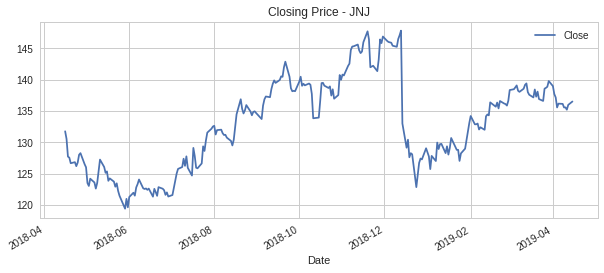

In [0]:
# Let's see a historical view of the closing price for JNJ(Johnson & Johnson)
JNJ['Close'].plot(title='Closing Price - JNJ',legend=True, figsize=(10,4))

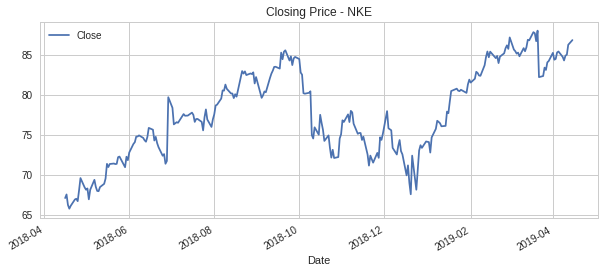

In [0]:
# Let's see a historical view of the closing price for NKE(Nike Inc.)
NKE['Close'].plot(title='Closing Price - NKE',legend=True, figsize=(10,4))

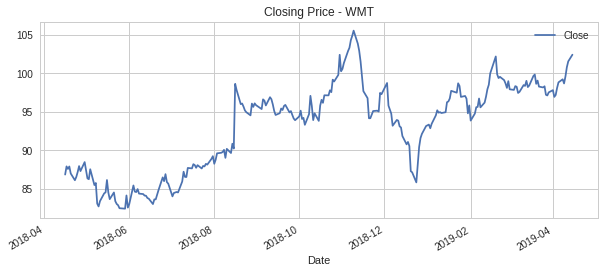

In [0]:
# Let's see a historical view of the closing price for WMT(Wal-Mart Stores Inc.)
WMT['Close'].plot(title='Closing Price - WMT',legend=True, figsize=(10,4))

### Value at risk using the "Bootstrap" method

we will calculate the empirical quantiles from a histogram of daily returns.

Let's go ahead and use pandas to retrieve the daily returns for the JNJ, WMT & NKE stock.

In [0]:
# We'll use pct_change to find the percent change for each day

#For JNJ stocks
JNJ['Daily Return'] = JNJ['Close'].pct_change()

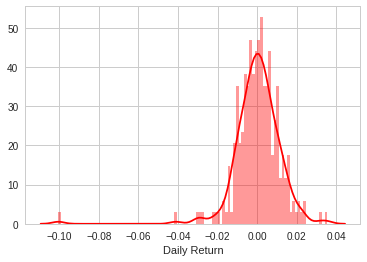

In [0]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(JNJ['Daily Return'].dropna(),bins=100,color='R')

In [0]:
(JNJ['Daily Return'].dropna()).quantile(0.05)

-0.014392722208436237

The 0.05 empirical quantile of JNJ stock daily returns is at -0.010. That means that with 95% confidence, our worst daily loss will not exceed 1%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.010 * 1,000,000 = $10,000.

In [0]:
# For WMT stocks
WMT['Daily Return'] = WMT['Close'].pct_change()

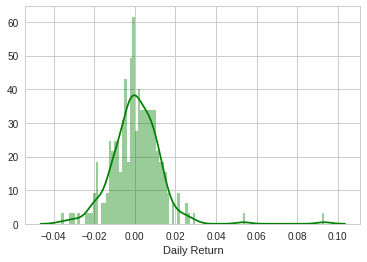

In [0]:
sns.distplot(WMT['Daily Return'].dropna(),bins=100,color='G')

In [0]:
(WMT['Daily Return'].dropna()).quantile(0.05)

-0.018973726152285375

The 0.05 empirical quantile of WMT stock daily returns is at -0.013. That means that with 95% confidence, our worst daily loss will not exceed 1.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.013 * 1,000,000 = $13,000.

In [0]:
# For NKE stocks
NKE['Daily Return'] = NKE['Close'].pct_change()

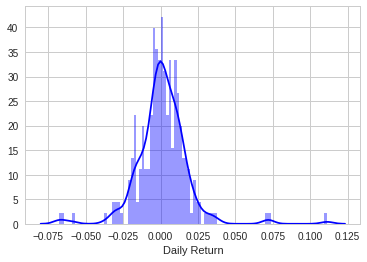

In [0]:
sns.distplot(NKE['Daily Return'].dropna(),bins=100,color='B')

In [0]:
(NKE['Daily Return'].dropna()).quantile(0.05)

-0.020351900198600226

The 0.05 empirical quantile of NKE stock daily returns is at -0.018. That means that with 95% confidence, our worst daily loss will not exceed 1.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.018 * 1,000,000 = $18,000.